In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

C:\Users\20191108\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Categories 

In [19]:
dict_category = {# Fiction
    'Fiction': [
        'fiction', 'genrefiction', 'comicbooks', 'strips', 'graphicnovels', 'comics', 'humor', 'contemporary', 
        'manga', 'roman', 'adventurestories', 'humorousstories', 'kriminalroman', 'literary', 'storiesinrhyme',
        'brothersandsisters', 'brothers', 'roommates', 'familylife', 'animalrelationships', 'femalefriendship', 
        'heroes', 'entertainment', 'fathersanddaughters', 'children', 'dating(socialcustoms)', 'emotions', 'growingup',
        'kings', 'queens', 'rulers', 'orphans', 'man', 'women', 'friendship', 'families', 'authors', 'artists'
        'vampires', 'werewolves', 'monsters', 'zombies', 'demonology', 'horror'
        'murder', 'investigation', 'privateinvestigators', 'mystery', 'detective', 'policeprocedural', 'spies', 
        'crime', 'womensleuths', 'mysteryanddetectivestories', 'assassination', 'serialmurders', 'missingpersons',
        'intelligenceofficers', 'secretservice', 'governmentinvestigators'
        'romance', 'womanrelationships', 'love', 'marriage', 'relationships', 'dating(socialcustoms)', 'youngwomen',
        'teenagegirls', 'teenageboys'
        'sciencefiction', 'spacewarfare', 'extraterrestrialbeings', 'timetravel'
        'thrillers', 'suspense', 'thriller', 'supervillains', 'psychologicalaspects', 'goodandevil', 'assassins'
        'historical'
        'youngadultfiction', 'teen', 'youngadult', 'highschoolstudents', 'teenagers'
        'fantasyfiction', 'fantasy', 'magic', 'wizards', 'dragons', 'imaginaryplaces', 'imaginarywarsandbattles', 
        'fantasycomicbooks', 'quests(expeditions)', 'supernatural', 'spirits', 'pokémon(fictitiouscharacters)', 
        'witches', 'superheroes'
        "children'sfiction", 'juvenilefiction', 'juvenileliterature', "children'sbooks", 'highschoolstudents', 
        'teenagegirls', 'teenageboys', 'girls', 'schools', 'princesses', 'cats', 'dogs', 'brothersandsisters', 
        'mothersanddaughters', 'treasuretroves'
    ],
    
    # Non-Fiction
    'Non-Fiction': [
        'general', 'translationsintoenglish', 'self', 'actualization(psychology)', 'amerikanischesenglisch', 
        'unitedstates', 'anecdotes', 'families', 'nutrition', 'family', 'animals', 'americans', 
        'interpersonalrelations', 'personalbeauty', 'death', 'success', 'descriptionandtravel', 
        'survival', 'comedians', 'care', 'socialconditions', 'human', 'entrepreneurship', 'footballplayers', 
        'interiordecoration', 'fathersandsons', 'philosophy', 'boys', 'soul', 'cooking', 'secrets', 'rockmusicians', 
        'artists', 'children', 'socialaspects', 'racerelations', 'etc.', 'pictorialworks', 'twins', 
        'politicalculture', 'jews', 'business', 'education', '2009', 'miscellanea', 'emotions', 'fitness', 
        'a', 'z', 'management', 'sports', 'identity', 'factsoflife', 'highschools', 'popularworks', 'aging', 
        'american', 'performingarts', 'socialissues', 'esteem', 'body', 'low', 'help', 'personalfinance',
        'collegestudents', 'fashion', 'christianity', 'africanamericans', 'motionpictureactorsandactresses',
        'policewomen', 'baseballplayers', 'newyork(n.y.)', 'foodhabits', 'journalists', 'leadership', 
        'marriedpeople', 'prisoners', 'healthandhygiene', 'survivalism', 'lifechangeevents', 'televisionactorsandactresses', 
        'officialsandemployees', 'unitedstates.federalbureauofinvestigation'
        'biography', 'memoirs', 'autobiography', 'biographies', 'personalmemoirs', 'actors', 'televisionpersonalities', 
        'presidents', 'authors', 'fathersanddaughters', 'sisters'
        'self', 'actualization(psychology)', 'healthandhygiene', 'self-help', 'success', 'happiness', 'realization'
        'history', 'worldwar', 'presidents', '1939', '1945', 'historical', 'civilization', 'socialconditions', 
        'politicalculture', 'greatbritain', 'crimesagainst', 'politics', 'politicsandgovernment'
        'truecrime', 'crime', 'serialmurders', 'governmentinvestigators', 'assassination', 'terrorism', 
        'corruptpractices'
        'health', 'nutrition', 'weightloss', 'reducingdiets', 'personalbeauty', 'healthandhygiene', 'cancer', 
        'mentalhealth', 'selfhelp', 'prevention'
        'successinbusiness', 'businesspeople', 'finance', 'personalfinance', 'corruptpractices', 'economicpolicy', 
        'entrepreneurship', 'management'
        'science', 'technology', 'mind'
        'recipes', 'cookbooks'
        'politicsandgovernment', 'election', 'politicalcampaigns', 'foreignrelations', 'officialsandemployees', 
        'politics', 'socialsciences', 'politicalscience', 'politicsandcurrentaffairs', 'conservatism', 
        'economicpolicy', 'presidentialcandidates'
        'travel', 'descriptionandtravel']
}
 

dict_subcategory = {
   # Fiction
    'General Fiction': ['fiction', 'roman', 'genrefiction'],
    'Other Fiction': [
        'humor', 'contemporary', 
        'adventurestories', 'humorousstories', 'kriminalroman', 'literary', 'storiesinrhyme',
        'brothersandsisters', 'brothers', 'roommates', 'familylife', 'animalrelationships', 'femalefriendship', 
        'heroes', 'entertainment', 'fathersanddaughters', 'children', 'dating(socialcustoms)', 'emotions', 'growingup',
        'kings', 'queens', 'rulers', 'orphans', 'man', 'women', 'friendship', 'families', 'authors', 'artists'
    ],
    'Horror': [
        'vampires', 'werewolves', 'monsters', 'zombies', 'demonology', 'horror'
    ],
    'Mystery/crime': [
        'murder', 'investigation', 'privateinvestigators', 'mystery', 'detective', 'policeprocedural', 'spies', 
        'womensleuths', 'mysteryanddetectivestories', 'assassination', 'missingpersons',
        'intelligenceofficers', 'secretservice'
    ],
    'Romance': [
        'romance', 'womanrelationships', 'love', 'marriage', 'relationships', 'dating(socialcustoms)', 'youngwomen',
        'teenagegirls', 'teenageboys'
    ],
    'Science fiction': [
        'sciencefiction', 'spacewarfare', 'extraterrestrialbeings', 'timetravel'
    ],
    'Thriller/suspense': [
        'thrillers', 'suspense', 'thriller', 'supervillains', 'psychologicalaspects', 'goodandevil', 'assassins'
    ],
    'Westerns': [],
    'Young adult': [
        'youngadultfiction', 'teen', 'youngadult', 'highschoolstudents', 'teenagers'
    ],
    'Fantasy': [
        'fantasyfiction', 'fantasy', 'magic', 'wizards', 'dragons', 'imaginaryplaces', 'imaginarywarsandbattles', 
        'fantasycomicbooks', 'quests(expeditions)', 'supernatural', 'spirits', 'pokémon(fictitiouscharacters)', 
        'witches', 'superheroes'
    ],
    'Kids': [
        "children'sfiction", 'juvenilefiction', 'juvenileliterature', "children'sbooks", 'highschoolstudents', 
        'teenagegirls', 'teenageboys', 'girls', 'schools', 'princesses', 'cats', 'dogs', 'brothersandsisters', 
        'mothersanddaughters', 'treasuretroves'
    ],
    'Graphic Novels': ['comicbooks', 'strips', 'graphicnovels', 'comics', 'manga'],
    
    # Non-Fiction
    'General Non-Fiction': ['general', 'nonfiction'],
    'Other Non-Fiction': [ 
        'anecdotes', 'families', 'family', 'animals', 
        'death', 'descriptionandtravel', 
        'survival', 'comedians', 'socialconditions', 'human', 'footballplayers', 
        'interiordecoration', 'fathersandsons', 'philosophy', 'boys', 'rockmusicians', 
        'artists', 'children', 'socialaspects', 'racerelations', 'etc.', 'pictorialworks', 'twins', 
        'jews', 'education', '2009', 'miscellanea',  
        'a', 'z', 'sports', 'identity', 'factsoflife', 'highschools', 'popularworks', 'aging', 
        'performingarts',  'personalfinance',
        'collegestudents', 'fashion', 'christianity', 'africanamericans', 'motionpictureactorsandactresses',
        'policewomen', 'baseballplayers', 'newyork(n.y.)', 'foodhabits', 'journalists',
        'prisoners', 'televisionactorsandactresses', 
        'unitedstates.federalbureauofinvestigation'
    ],
    'Biographies and Memoirs': [
        'biography', 'memoirs', 'autobiography', 'biographies', 'personalmemoirs', 'actors', 'televisionpersonalities', 
        'presidents', 'authors', 'fathersanddaughters', 'sisters'
    ],
    'Self-Help': [
        'soul', 'secrets', 'success', 'esteem', 'body', 'low', 'help', 'emotions', 'personalbeauty', 'interpersonalrelations', 'marriedpeople', 'survivalism', 
        'lifechangeevents', 'care', 'self', 'actualization(psychology)', 'self', 'actualization(psychology)', 'healthandhygiene', 'self-help', 'success', 'happiness', 'realization'
    ],
    'History': [
        'history', 'worldwar', 'presidents', '1939', '1945', 'historical', 'civilization', 'socialconditions', 
        'politicalculture', 'greatbritain', 'crimesagainst', 'politics', 'politicsandgovernment'
    ],
    'True Crime': [
        'truecrime', 'crime', 'serialmurders', 'governmentinvestigators', 'assassination', 'terrorism', 
        'corruptpractices'
    ],
    'Health and Wellness': [
        'fitness', 'nutrition', 'healthandhygiene', 'health', 'nutrition', 'weightloss', 'reducingdiets', 'personalbeauty', 'healthandhygiene', 'cancer', 
        'mentalhealth', 'selfhelp', 'prevention'
    ],
    'Business and Finance': [
        'management', 'leadership', 'officialsandemployees', 'business', 'successinbusiness', 'businesspeople', 'finance', 'personalfinance', 'corruptpractices', 'economicpolicy', 
        'entrepreneurship', 'management', 'entrepreneurship'
    ],
    'Science and Technology': [
        'science', 'technology', 'mind'
    ],
    'Cookbooks': [
        'cooking', 'recipes', 'cookbooks'
    ],
    'Politics and Current Affairs': [
        'politicalculture', 'socialissues', 'politicsandgovernment', 'election', 'politicalcampaigns', 'foreignrelations', 'officialsandemployees', 
        'politics', 'socialsciences', 'politicalscience', 'politicsandcurrentaffairs', 'conservatism', 
        'economicpolicy', 'presidentialcandidates'
    ],
    'Travel and Languages': [
         'american', 'americans', 'unitedstates', 'travel', 'descriptionandtravel', 'translationsintoenglish', 'amerikanischesenglisch'
    ]
}

In [20]:
genre_groups = {
'Literature & Fiction' : 'Fiction' ,
'Mystery' : 'Fiction' , 
' Thriller & Suspense' : 'Fiction' ,
'Genre Fiction' : 'Fiction' , 
'Thrillers & Suspense' : 'Fiction' , 
"Children's Books" : 'Kids and Young Adults' ,
'Action & Adventure' : 'Fiction' , 
'Teen & Young Adult' : 'Kids and Young Adults' ,
'Biographies & Memoirs' : 'Non-fiction', 
'Growing Up & Facts of Life' : 'Kids and Young Adults' ,
'Politics & Social Sciences' : 'Non-fiction', 
'Business & Money' : 'Non-fiction',
"Women's Fiction" : 'Fiction' , 
'Science Fiction & Fantasy' : 'Fiction' , 
'Fantasy' : 'Fiction' ,
'Health' : 'Non-fiction', 
' Fitness & Dieting' : 'Activities', 
'Cookbooks' : 'Activities', 
' Food & Wine' : 'Activities',
'Christian Books & Bibles' : 'Non-fiction',
'Education & Reference' : 'Non-fiction',
'Humor & Entertainment' : 'Activities', 
'United States' : 'Regional & International', 
'Activities' : 'Activities',
' Crafts & Games' : 'Activities', 
'Medical Books' : 'Non-fiction', 
'Regional & International' : 'Regional & International',
'Arts & Photography': 'Activities', 
'Comics & Graphic Novels' : 'Fiction' , 
'History' : 'Non-fiction',
'Crafts' : 'Activities', 
' Hobbies & Home': 'Activities', 
'Self-Help' : 'Self-help',
'Relationships' : 'Self-help',
'Arts & Literature' : 'Non-fiction',
'Social Sciences' : 'Non-fiction',
'Psychology & Counseling' : 'Self-help',
'Romance': 'Fiction',
'Business Culture' : 'Non-fiction', 
'Medicine' : 'Non-fiction' ,
'Management & Leadership' : 'Non-fiction', 
'Politics & Government' : 'Non-fiction',
'Happiness' : 'Self-help',
'Family Life' : 'Self-help', 
'Graphic Novels' : 'Fiction' , 
'Humor' : 'Activities', 
'Animals' : 'Non-fiction', 
'Historical' : 'Non-fiction',
'World' : 'Regional & International',
'Crafts & Hobbies' : 'Activities',
'Scottish' : 'Regional & International'
}

### Genre Per Year

In [21]:
df_genre_per_year = pd.read_csv('genre_per_year.csv')
df_genre_per_year

,genreTitle,yearTitle,bookCount
0,Fiction,2015,129
1,Fiction,2012,126
2,Fiction,2014,120
3,Fiction,2016,110
4,Fiction,2013,102
...,...,...,...
7784,Cooperating objects (Computer systems),2016,1
7785,Married people,2012,1
7786,FICTION / Literary,2012,1
7787,FICTION / Historical,2012,1


In [22]:
def delete_multilayer_genres(text, symbols = ['/', '--']):
    if not isinstance(text, str):
            # Convert non-string values to an empty string
            text = str(text) if text is not None else ''
    # Sort symbols by length in descending order to handle multi-character symbols first
    symbols = sorted(symbols, key=len, reverse=True)
    for symbol in symbols:
        # Create a regex pattern to match the symbol and everything after it
        pattern = re.escape(symbol) + '.*'
        # Replace the pattern with an empty string
        text = re.sub(pattern, '', text)
    return text

In [23]:
def expand_multilayer_genres(df, string_col, value_cols, symbols):
    df[string_col] = df[string_col].astype(str)
    # Create a regex pattern that matches any of the delimiters
    pattern = '[' + re.escape(''.join(symbols)) + ']'
    
    new_rows = []

    for _, row in df.iterrows():
        parts = re.split(pattern, row[string_col])
        for part in parts:
            new_row = {string_col: part}
            for col in value_cols:
                new_row[col] = row[col]
            new_rows.append(new_row)

    new_df = pd.DataFrame(new_rows)
    return new_df

# List of delimiters
symbols = ['/', '--', '&']

# List of value columns
value_cols = ['bookCount', 'yearTitle']


In [24]:
def clean_capitals_and_spaces(text):
    if not isinstance(text, str):
        # Convert non-string values to an empty string
        return str(text) if text is not None else ''
    text = text.replace(' ', '')
    text = text.lower()
    return text

In [25]:
def clean_rare_genres(df, grouping_col, filtering_col):
    count_per_genre = df.groupby(grouping_col)[filtering_col].sum().to_dict()
    to_keep = [genre for genre, count in count_per_genre.items() if count >= 10]
    df = df[df[grouping_col].isin(to_keep)]
    return df

In [26]:
def add_category_column(df, dictionary, title):    
    def map_genre_to_category(genre):
        for category, genres in dictionary.items():
            if genre in genres:
                return category
        return None
    
    # Map genre column to fiction or non-fiction
    df[title] = df['genre'].apply(map_genre_to_category)

    return df

In [27]:
# Clean data 
df_genre_per_year = expand_multilayer_genres(df_genre_per_year, 'genreTitle', value_cols, symbols)
df_genre_per_year['genre'] = df_genre_per_year['genreTitle'].apply(clean_capitals_and_spaces)
df_genre_per_year = clean_rare_genres(df_genre_per_year, 'genre', 'bookCount')

In [28]:
# Map genre column to fiction or non-fiction
df_genre_per_year = add_category_column(df_genre_per_year, dict_category, 'category')
df_genre_per_year = add_category_column(df_genre_per_year, dict_subcategory, 'subcategory')

In [77]:
from collections import OrderedDict
def plot_heatmap(df, col1, col2):
    df = df.groupby([col1, col2, 'yearTitle']).sum('bookCount').reset_index()
    df = df.pivot(index=[col1, col2], columns="yearTitle", values="bookCount").fillna(0)

    plt.figure(figsize=(12, 20)) 

    ax = sns.heatmap(df, cmap=sns.light_palette("red", as_cmap=True))

    ylabel_mapping = OrderedDict()
    for col1, col2 in df.index:
        ylabel_mapping.setdefault(col1, [])
        ylabel_mapping[col1].append(col2)

    hline = []
    new_ylabels = []
    cumulative_len = 0
    for col1, col2 in ylabel_mapping.items():
        # col1[0] = "{} - {}".format(col1, col2[0])
        new_ylabels.extend(col2)

        cumulative_len += len(col2)
        hline.append(cumulative_len)  # Adjusted for heatmap indexing

    # Draw the horizontal lines
    ax.hlines(hline, xmin=-1, xmax=len(df.columns), color="black", linewidth=2)
    # Set the y-axis labels with appropriate number of ticks
    ax.set_yticks(range(len(new_ylabels)))
    ax.set_yticklabels(new_ylabels, size = 20)
    ax.set_xticklabels(ax.get_xticklabels(), size=20)
    ax.set_xlabel('')
    ax.set_ylabel('')
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)

    plt.savefig("heatmap_red.png", format="png", bbox_inches="tight")
    plt.show();

In [78]:
# Plot heatmap 
#plot_heatmap (df_genre_per_year, 'category', 'subcategory')

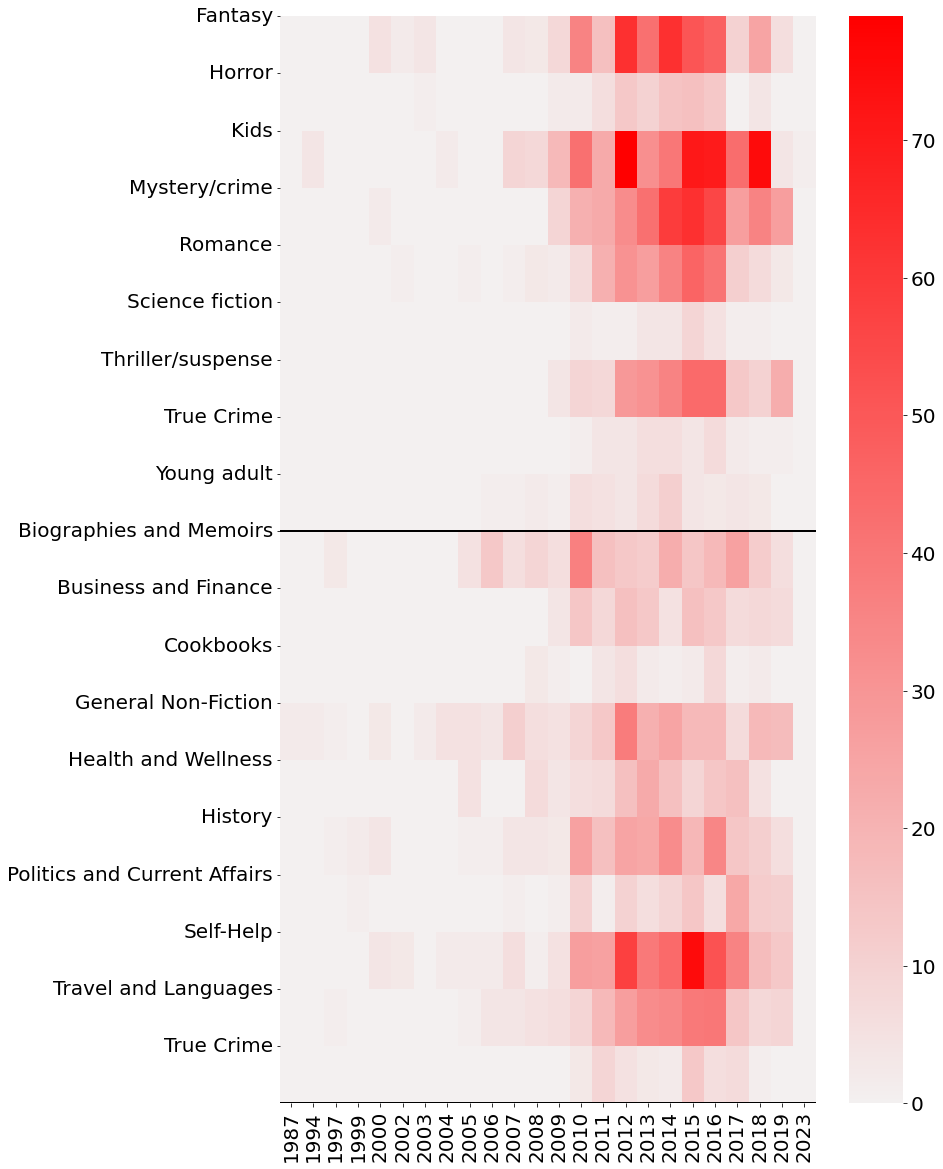

In [79]:
df_genre_per_year_without_general = df_genre_per_year[
    (df_genre_per_year['subcategory'] != 'General Fiction') &
    (df_genre_per_year['subcategory'] != 'Graphic Novels') &
    (df_genre_per_year['subcategory'] != 'Other Non-Fiction') &
    (df_genre_per_year['subcategory'] != 'Other Fiction') 
]
plot_heatmap (df_genre_per_year_without_general, 'category', 'subcategory')

In [76]:
.

SyntaxError: invalid syntax (<ipython-input-76-a5d5b61aa8a6>, line 1)

### Authors Career

In [80]:
df_genre_per_year = pd.read_csv('genre_counts_per_year_for_heatmap.csv')
df_genre_per_year

,genreTitle,yearTitle,bookCount
0,Literature & Fiction,2020,50
1,Literature & Fiction,2021,48
2,Literature & Fiction,2019,37
3,Mystery,2020,34
4,Thriller & Suspense,2020,34
...,...,...,...
1062,Greek & Roman,2005,1
1063,LGBTQ+ Books,2021,1
1064,Psychological Thrillers,2018,1
1065,Children's Books,1977,1


In [81]:
df_genre_per_year = df_genre_per_year[df_genre_per_year["bookCount"] > 2]
df_genre_per_year

,genreTitle,yearTitle,bookCount
0,Literature & Fiction,2020,50
1,Literature & Fiction,2021,48
2,Literature & Fiction,2019,37
3,Mystery,2020,34
4,Thriller & Suspense,2020,34
...,...,...,...
209,Thrillers & Suspense,2023,3
210,Comics & Graphic Novels,2018,3
211,Crafts,2017,3
212,Hobbies & Home,2017,3


In [82]:
df_genre_per_year["genreTitle"].unique()

array(['Literature & Fiction', 'Mystery', ' Thriller & Suspense',
       'Genre Fiction', 'Thrillers & Suspense', "Children's Books",
       'Action & Adventure', 'Teen & Young Adult',
       'Biographies & Memoirs', 'Growing Up & Facts of Life',
       'Politics & Social Sciences', 'Business & Money',
       "Women's Fiction", 'Science Fiction & Fantasy', 'Fantasy',
       'Health', ' Fitness & Dieting', 'Cookbooks', ' Food & Wine',
       'Christian Books & Bibles', 'Education & Reference',
       'Humor & Entertainment', 'United States', 'Activities',
       ' Crafts & Games', 'Medical Books', 'Regional & International',
       'Arts & Photography', 'Comics & Graphic Novels', 'History',
       'Crafts', ' Hobbies & Home', 'Self-Help', 'Relationships',
       'Arts & Literature', 'Social Sciences', 'Psychology & Counseling',
       'Romance', 'Business Culture', 'Medicine',
       'Management & Leadership', 'Politics & Government', 'Happiness',
       'Family Life', 'Graphic Novels',

In [83]:
df_genre_per_year["genreGroup"] = df_genre_per_year["genreTitle"].map(genre_groups)

<ipython-input-83-295c7f309019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre_per_year["genreGroup"] = df_genre_per_year["genreTitle"].map(genre_groups)


In [84]:
df_genre_per_year_pivot = df_genre_per_year.pivot(index=[ "genreGroup", "genreTitle"], columns="yearTitle", values="bookCount")
df_genre_per_year_pivot = df_genre_per_year_pivot.fillna(0)
df_genre_per_year_pivot

yearTitle                                            2000  2007  2008  2009  \
genreGroup               genreTitle                                           
Activities                Crafts & Games              0.0   0.0   0.0   0.0   
                          Fitness & Dieting           0.0   0.0   0.0   0.0   
                          Food & Wine                 0.0   0.0   0.0   0.0   
                          Hobbies & Home              0.0   0.0   0.0   0.0   
                         Activities                   0.0   0.0   0.0   0.0   
                         Arts & Photography           0.0   0.0   0.0   0.0   
                         Cookbooks                    0.0   0.0   0.0   0.0   
                         Crafts                       0.0   0.0   0.0   0.0   
                         Crafts & Hobbies             0.0   0.0   0.0   0.0   
                         Humor                        0.0   0.0   0.0   0.0   
                         Humor & Entertainment        0.0   0.0   0.0   0.0   
Fiction                   Thriller & Suspense         0.0   0.0   3.0   0.0   
                         Action & Adventure           0.0   0.0   0.0   0.0   
                         Comics & Graphic Novels      0.0   0.0   0.0   0.0   
                         Fantasy                      0.0   0.0   0.0   0.0   
                         Genre Fiction                0.0   0.0   0.0   3.0   
                         Graphic Novels               0.0   0.0   0.0   0.0   
                         Literature & Fiction         3.0   0.0   7.0  10.0   
                         Mystery                      0.0   0.0   3.0   0.0   
                         Romance                      0.0   0.0   0.0   0.0   
                         Science Fiction & Fantasy    0.0   0.0   0.0   0.0   
                         Thrillers & Suspense         0.0   0.0   3.0   0.0   
                         Women's Fiction              0.0   0.0   0.0   0.0   
Kids and Young Adults    Children's Books             0.0   4.0   8.0   3.0   
                         Growing Up & Facts of Life   0.0   0.0   4.0   0.0   
                         Teen & Young Adult           0.0   0.0   0.0   3.0   
Non-fiction              Animals                      0.0   0.0   0.0   0.0   
                         Arts & Literature            0.0   0.0   0.0   0.0   
                         Biographies & Memoirs        0.0   0.0   0.0   0.0   
                         Business & Money             0.0   0.0   0.0   0.0   
                         Business Culture             0.0   0.0   0.0   0.0   
                         Christian Books & Bibles     0.0   0.0   0.0   3.0   
                         Education & Reference        0.0   0.0   0.0   0.0   
                         Health                       0.0   0.0   0.0   0.0   
                         Historical                   0.0   0.0   0.0   0.0   
                         History                      0.0   0.0   0.0   0.0   
                         Management & Leadership      0.0   0.0   0.0   0.0   
                         Medical Books                0.0   0.0   0.0   0.0   
                         Medicine                     0.0   0.0   0.0   0.0   
                         Politics & Government        0.0   0.0   0.0   0.0   
                         Politics & Social Sciences   0.0   0.0   0.0   0.0   
                         Social Sciences              0.0   0.0   0.0   0.0   
Regional & International Regional & International     0.0   0.0   0.0   0.0   
                         Scottish                     0.0   0.0   0.0   0.0   
                         United States                0.0   0.0   0.0   0.0   
                         World                        0.0   0.0   0.0   0.0   
Self-help                Family Life                  0.0   0.0   0.0   0.0   
                         Happiness                    0.0   0.0   0.0   0.0   
                         Psychology & Counseling  

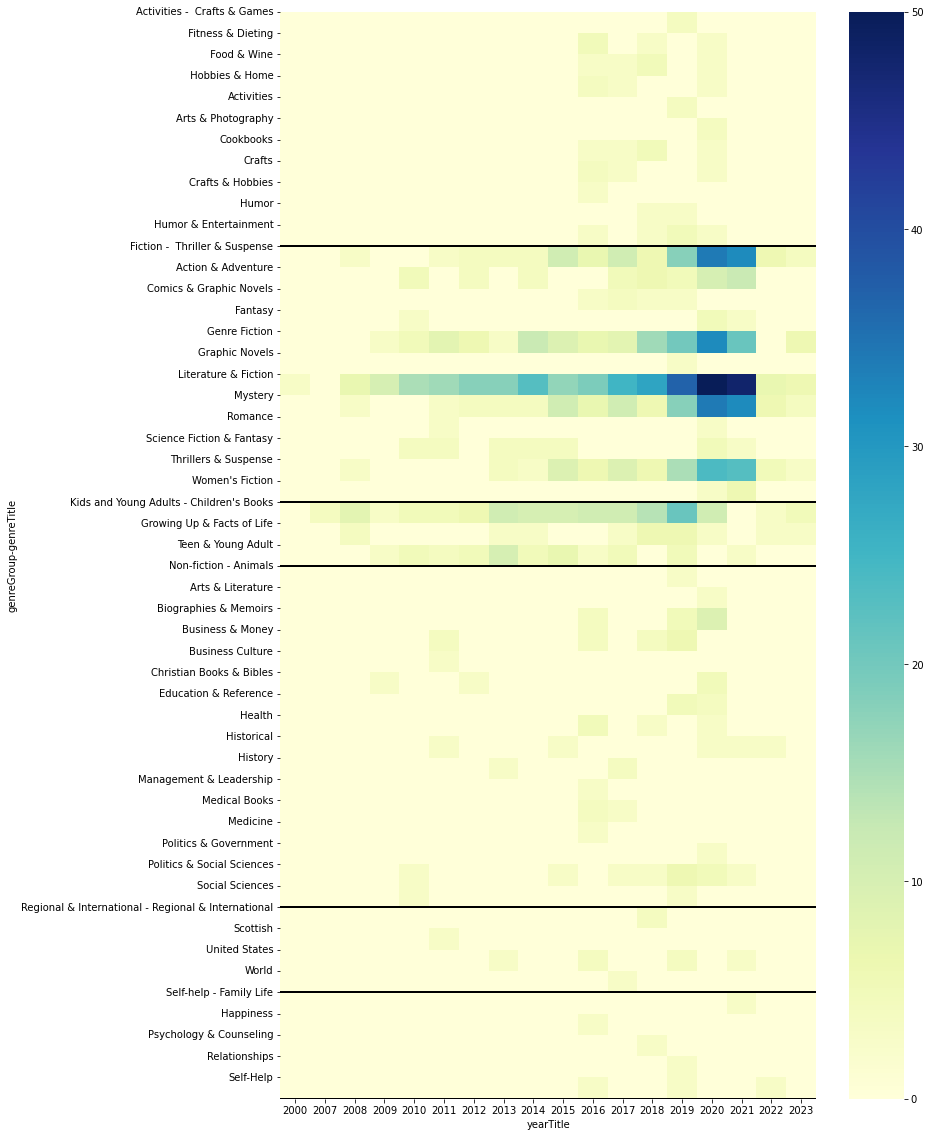

In [85]:
from collections import OrderedDict
df = df_genre_per_year_pivot

plt.figure(figsize=(12, 20)) 

ax = sns.heatmap(df, cmap="YlGnBu")

ylabel_mapping = OrderedDict()
for group, genre in df.index:
    ylabel_mapping.setdefault(group, [])
    ylabel_mapping[group].append(genre)
    
hline = []
new_ylabels = []
cumulative_len = 0
for group, genres in ylabel_mapping.items():
    genres[0] = "{} - {}".format(group, genres[0])
    new_ylabels.extend(genres)
    
    cumulative_len += len(genres)
    hline.append(cumulative_len)  # Adjusted for heatmap indexing

# Draw the horizontal lines
ax.hlines(hline, xmin=-1, xmax=len(df.columns), color="black", linewidth=2)
# Set the y-axis labels with appropriate number of ticks
ax.set_yticks(range(len(new_ylabels)))
ax.set_yticklabels(new_ylabels)

plt.show();

### Author ages


In [86]:
df_author_age = pd.read_csv('author_ages_book_counts.csv')
df_author_age = df_author_age.set_index('authorAge')
df_author_age.head()

,bookCount
authorAge,
99,2
98,1
97,4
96,2
95,1


<ipython-input-101-f94a28a17ec4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=20)


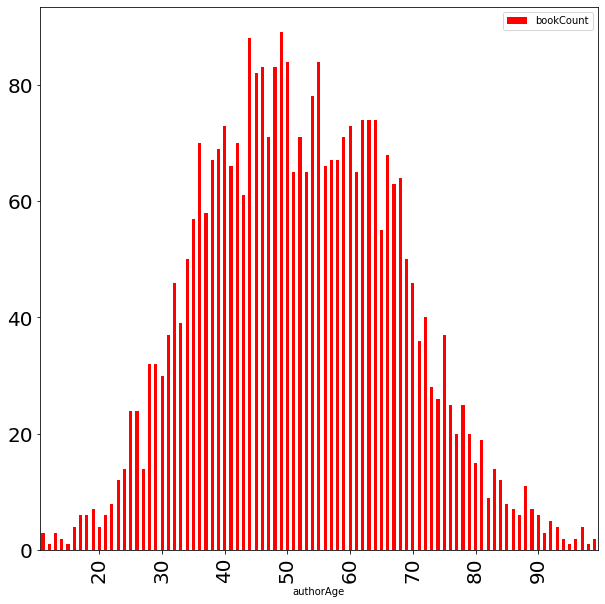

In [101]:
# Assuming df_author_age is already defined and contains the data
fig, ax = plt.subplots(figsize = (10,10))
df_author_age.plot(kind='bar', ax=ax, color = 'red')

# Set x-axis labels to show only every 10th age
ax.set_xticks([i for i in range(len(df_author_age)) if df_author_age.index[i] % 10 == 0])
ax.set_xticklabels([age for age in df_author_age.index if age % 10 == 0])
ax.invert_xaxis()
# Set the label for the x-axis
ax.set_yticklabels(ax.get_yticklabels(), size=20)
ax.set_xticklabels(ax.get_xticklabels(), size=20)
# Set the label for the x-axis
plt.savefig("AgeBestsellers.png", format="png", bbox_inches="tight")


plt.show()

### Best sellers per author

In [88]:
df_bestseller_per_author = pd.read_csv('bestsellers_per_author.csv')
df_bestseller_per_author = df_bestseller_per_author.set_index('bestSellersByAuthor')
df_bestseller_per_author.head()

,noAuthors
bestSellersByAuthor,
1,2985
2,658
3,315
4,172
5,110


<ipython-input-96-03e5db30b2ff>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=20)


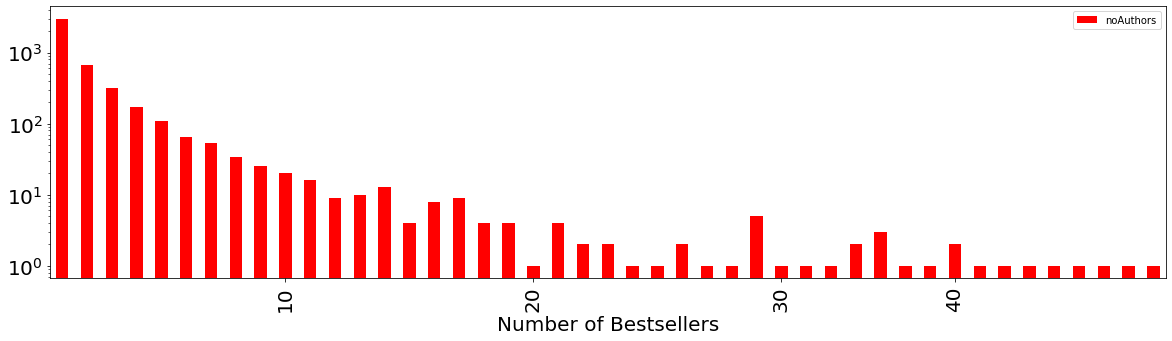

In [96]:
# Assuming df_author_age is already defined and contains the data
fig, ax = plt.subplots(figsize = (20,5))
df_bestseller_per_author.plot(kind='bar', ax=ax, color = 'red')
ax.set_yscale('log')
# Set x-axis labels to show only every 10th age
ax.set_xticks([i for i in range(len(df_bestseller_per_author)) if df_bestseller_per_author.index[i] % 10 == 0])
ax.set_xticklabels([bestseller for bestseller in df_bestseller_per_author.index if bestseller % 10 == 0], size = 20)
ax.set_yticklabels(ax.get_yticklabels(), size=20)
# Set the label for the x-axis
ax.set_xlabel('Number of Bestsellers', size = 20)
plt.savefig("numberBestsellers.png", format="png", bbox_inches="tight")

plt.show()